In [3]:
import torch
from diffusers import DiffusionPipeline

from transformers import XLMRobertaTokenizerFast,XLMRobertaModel
from diffusers import FlowMatchEulerDiscreteScheduler
from diffusers.models import AutoencoderKL
from diffusers import SanaTransformer2DModel
#from pipeline_waifu import WaifuPipeline

pipe_id = "/workspace/waifu-2b"
variant = "fp16"
# tokenizer
tokenizer = XLMRobertaTokenizerFast.from_pretrained(
    pipe_id,
    subfolder="tokenizer"
)

# text_encoder
text_encoder = XLMRobertaModel.from_pretrained(
    pipe_id,
    variant=variant,
    subfolder="text_encoder",
    add_pooling_layer=False
).to("cuda")

# scheduler
scheduler = FlowMatchEulerDiscreteScheduler(shift=1.0)

# VAE
vae = AutoencoderKL.from_pretrained(
    pipe_id,
    variant=variant,
    subfolder="vae"
).to("cuda")

# Transformer
transformer = SanaTransformer2DModel.from_pretrained(
    pipe_id,
    variant=variant,
    subfolder="transformer"
).to("cuda")

# Pipeline
pipeline = DiffusionPipeline.from_pretrained(
    pipe_id,
    tokenizer=tokenizer,
    text_encoder=text_encoder,
    vae=vae,
    transformer=transformer,
    trust_remote_code=True,
).to("cuda")
print(pipeline)

prompt = 'аниме девушка, waifu, يبتسم جنسيا , sur le fond de la tour Eiffel'
generator = torch.Generator(device="cuda").manual_seed(42)

image = pipeline(
    prompt = prompt,
    negative_prompt = "",
    generator=generator,
)[0]

for img in image:
    img.show()
    img.save('waifu.png')


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 23.60 GiB of which 20.12 MiB is free. Process 2530909 has 23.57 GiB memory in use. Of the allocated memory 23.21 GiB is allocated by PyTorch, and 107.58 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

  0%|          | 0/20 [00:00<?, ?it/s]

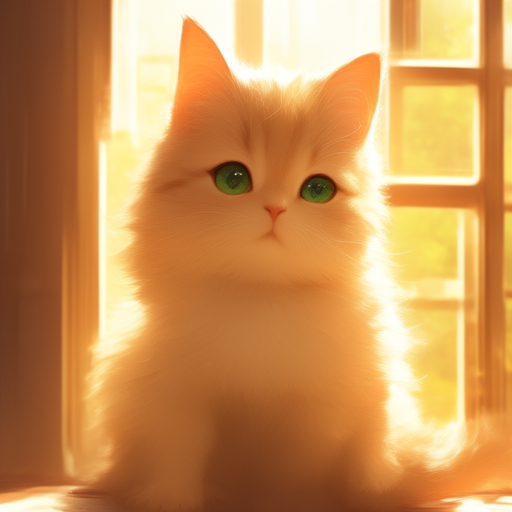

In [5]:
prompt = 'A fluffy domestic cat with piercing green eyes sits attentively in a sunlit room filled natural light streaming through large windows, its soft fur reflecting warm hues of orange from the golden glow casting across its sleek body and delicate features'
generator = torch.Generator(device="cuda").manual_seed(65536)

image = pipeline(
    prompt = prompt,
    negative_prompt = "",
    generator=generator,
)[0]

for img in image:
    img.show()
    img.save('1.png')